In [2]:
#%reset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

#import cmath as cm
#import math as m

# 1- Código personal que calcule transformada de Fourier de una función f(x)

Forward Discrete Fourier Transform (DFT):


$X_k=\sum_{n=0}^{N−1}x_n\cdot e^{−i 2\pi k n / N}$

In [4]:
"""tranformada de fourier discreta 1D"""

def dft(data):
    N = len(data)  #nos dice el no, de muestras
    dataft = np.array([])
    
    for i in range(N):
        xi = 0
        
        for k in range(N):
            xi = xi + data[k]*(np.exp((-2j*np.pi*i*k)/N))
        
        dataft = np.append(dataft,[xi]) #agrega i entradas al vector con la nueva información de dataft
        
        
    return dataft
            

# 2 - Muestra la transformada de Fourier de una Gaussiana con dispersión s y centrada en x0=0.

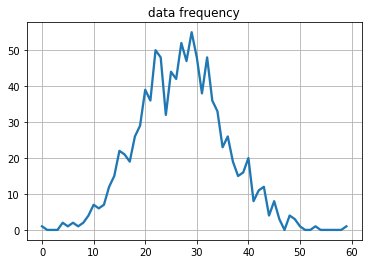

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


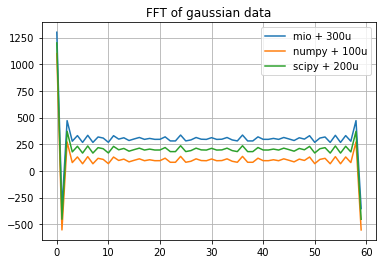

In [5]:
"""para los datos donde la media es 0"""
np.random.seed(42)

s = 0.4 #desv. estándar
N = 1000 #tamaño de la muestra
x0 = np.random.normal(0,s,N)

x0_hist = np.histogram(x0,60)[0]


#------------------------------------------------------------------------
#   FUNCIONES
#------------------------------------------------------------------------
miox0 = dft(x0_hist) #mio
numpyx0 = np.fft.fft(x0_hist)
scipyx0 = sc.fft(x0_hist)

#------------------------------------------------------------------------
#  GRÁFICOS
#------------------------------------------------------------------------
plt.plot(x0_hist ,label = 'data', linewidth = 2.3)
plt.title('data frequency')
plt.grid(linestyle='-')
plt.show()

plt.plot(miox0 + 300, label = 'mio + 300u')
plt.plot(numpyx0 + 100, label = 'numpy + 100u')
plt.plot(scipyx0 + 200, label = 'scipy + 200u')
plt.title('FFT of gaussian data')
plt.grid(linestyle='-')
plt.legend()
plt.show()

a) ¿Qué pasa si x0=1 con la transformada?


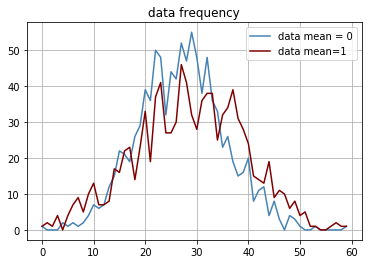

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


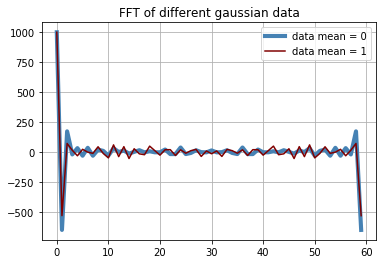

In [6]:
"""now we change the median"""

np.random.seed(69)

s1 = 0.4 #desv. estándar
N = 1000 #tamaño de la muestra
x1 = np.random.normal(1,s1,N)

x1_hist = np.histogram(x1,60)[0]

#------------------------------------------------------------------------
#   FUNCIONES
#------------------------------------------------------------------------
miox1 = dft(x1_hist)

#------------------------------------------------------------------------
#  GRÁFICOS
#------------------------------------------------------------------------
plt.plot(x0_hist,'-',  color = 'steelblue' ,label = 'data mean = 0')
plt.plot(x1_hist,'-' ,color = 'maroon', label = 'data mean=1')
plt.title('data frequency')
plt.grid(linestyle='-')
plt.legend()
plt.show()

plt.plot(miox0, color = 'steelblue', label = 'data mean = 0', linewidth = 4.1)
plt.plot(miox1, color = 'maroon', label = 'data mean = 1')
plt.title('FFT of different gaussian data')
plt.grid(linestyle='-')
plt.legend()
plt.show()


b) Escoge varios valores de s, ¿Qué pasa si s=1?


In [7]:
"""now we change the dispersions"""

s2 = 1 #desv. estándar
x2 = np.random.normal(1,s1,N)

hx2 = np.histogram(x1,60)[0]
fftx2 = dft(hx2)

c = 5 #numero de dispersiones distintas

si = np.random.rand(c) #Dispersiones random
x_si = np.zeros((c,N))

for i in range(c):
    x_si[i] = x_si[i] + np.random.normal(1,si[i],N)


C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


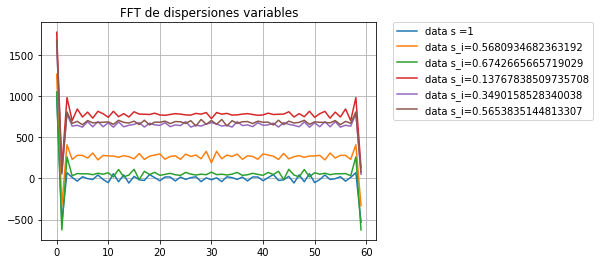

In [14]:
#hist_i = np.zeros(c)
plt.plot(fftx2, label = 'data s =1')
for i in range(c):
    hist_i = np.histogram(x_si[i],60)[0]
   
    ffteses = dft(hist_i)
    plt.plot(ffteses + np.random.rand()*800, label = 'data s_i='+str(si[i]))
    plt.grid(linestyle='-')
    plt.title('FFT de dispersiones variables')
    #moves the legendbox outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    


c) Compara lo obtenido con la función FFT (Nota: la salida de FFT puede esta con otro orden en k!)

C:\Users\Dea\Documents\anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


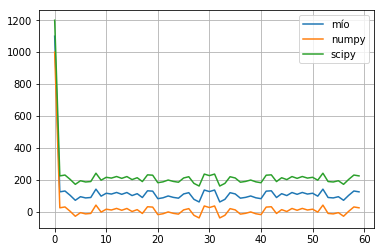

In [9]:
"""we create our random data"""

np.random.seed(42)

z = np.random.rand(1000)
h = np.histogram(z,60)[0]

"""compute the data"""
dftt = dft(h) #mio
fftt = np.fft.fft(h)
scipy = sc.fft(h)

"""visualize the data"""

#plt.plot(z*100,label = 'z')
plt.plot(dftt + 100, label = 'mío')
plt.plot(fftt, label = 'numpy')
plt.plot(scipy + 200, label = 'scipy')
plt.grid(linestyle='-')
plt.legend()
plt.show()

# 3 - Construye una caja de lado 1000 en 2 y 3 dimensiones de una distribución aletatoria de puntos.

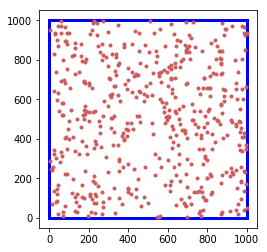

In [10]:
L = 1000 #tamaño de la caja
n = 500 #número de puntosque deseamos generar

#RNG
rng2D = np.random.rand(n,2)*L #n números de 2 columnas

#delimitante de la caja 2D
plt.axes()
box2d = plt.Rectangle((0,0),L,L , fc = 'white', ec = 'blue', linewidth=3.0)
plt.gca().add_patch(box2d)
plt.axis('scaled')
plt.plot(rng2D[:,0],rng2D[:,1],'.', color = 'indianred') 
plt.show()


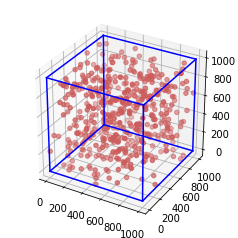

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

rng3d = np.random.rand(n,3)*L

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rng3d[:,0], rng3d[:,1], rng3d[:,2], color = 'indianred')
ax = fig.gca(projection = '3d')
ax.set_aspect('equal')

#caja 3D
r = [0,L] #limitante de la caja
for s,e in combinations(np.array(list(product(r,r,r))),2):
    if np.sum(np.abs(s-e)) == r[1] - r[0]:
        ax.plot3D(*zip(s,e),color = 'b')
        
plt.show()

# 4 - Código que calcule histograma de distancias para 2d y 3d de una distribución de puntos aleatorios, escogiendo el tamaño de los bins, y normalizada a que su area sea 1.

In [15]:
'''código que nos hará un histograma customized. 
 
 db: datos,
 n_bins: numero de barras, 
 dx: tamaño de las barras, 
 n: cantidad de datos
 range: rango de los datos de la forma (minimo, maximo)'''

def bar_norm(db, n_bins, dx, n, ranges):
    
    data = np.histogram(db, n_bins, ranges)[0]
    bins = np.histogram(db, n_bins, ranges)[1]
    
    
    A=dx*n
    width=dx/2
    fig, ax = plt.subplots()
    
    for i in range(len(bins)-1):
            ax.bar(bins[i] + width*1, data[i]/A, width*2, color='blue', edgecolor='black')
        
    plt.grid()
    plt.show()

In [19]:
"""Para contar la cantidad de puntos haremos un círculo en un punto pivote,
(el cual será en nuestro caso el centro de nuestra caja), este irá creciendo contando el número de puntos dentro de él
restando los del círculo anterior"""

a = 25 #tamaño de las barras
Rmax = int((2**(1/2)*L/2)/100)*100 
bins = int(Rmax/a) #ratio al que crecerá el círculo
ranges = (0,Rmax) 
A = a*n # normalización

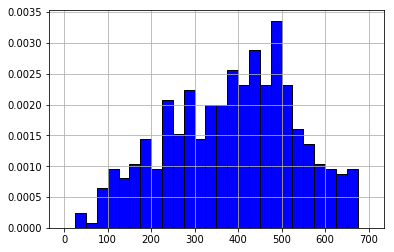

In [21]:
# radios en la caja 2D
r2d = ((rng2D[:,0] - L/2)**2 + (rng2D[:,1] - L/2)**2)**(1/2)

bar_norm(r2d, bins, a, n, ranges)

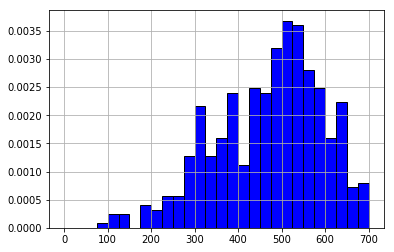

In [22]:
# radios en la caja 3D 
r3d = ((rng3d[:,0] - L/2)**2 + (rng3d[:,1] - L/2)**2 + (rng3d[:,2] - L/2)**2)**(1/2)

bar_norm(r3d, bins, a, n, ranges)